In [1]:
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import ROOT


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
def make_kkpi_histos(df_pipkmks, df_pimkpks, filter, nbins=60, xmin=1.0, xmax=1.6):
    hist_pipkmks = df_pipkmks.Histo1D((f'pipkmks_{filter}', f'pipkmks_{filter}', nbins, xmin, xmax), 'pipkmks_m')
    hist_pimkpks = df_pimkpks.Histo1D((f'pimkpks_{filter}', f'pimkpks_{filter}', nbins, xmin, xmax), 'pimkpks_m')
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetTitle(f'M(KK#pi) GeV')
    hist_pipkmks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    hist_pipkmks.GetYaxis().SetTitle('Counts/10MeV')
    hist_pimkpks.SetTitle(f'M(KK#pi) for {filter}')
    hist_pimkpks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    return hist_pipkmks.GetValue(), hist_pimkpks.GetValue()

def build_legend(hist_pipkmks, hist_pimkpks):
    leg = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
    leg.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
    leg.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
    return leg

In [4]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data', filtered=False)
c = ROOT.TCanvas()

In [5]:
df_pipkmks = df_pipkmks.Filter('pipkmks_m >= 1.0 && pipkmks_m <= 1.6')
df_pimkpks = df_pimkpks.Filter('pimkpks_m >= 1.0 && pimkpks_m <= 1.6')

In [6]:
n_uncut_pipkmks = df_pipkmks.Count().GetValue()
n_uncut_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_uncut, hist_pimkpks_uncut = make_kkpi_histos(df_pipkmks, df_pimkpks, 'uncut')

uncut pipkmks: 1006679 || uncut pimkpks: 990125


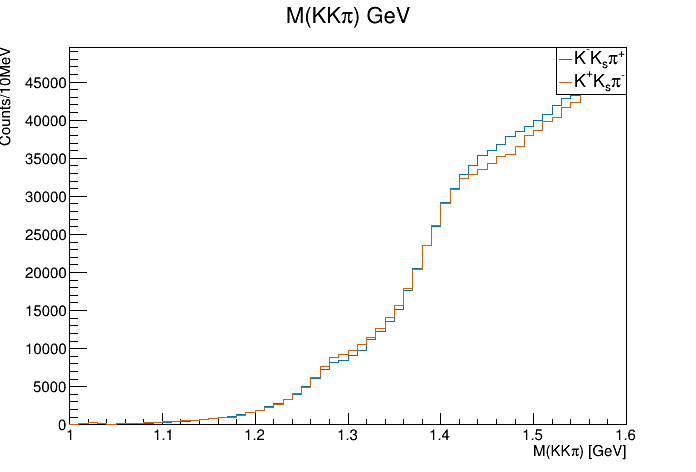

In [7]:
print(f'uncut pipkmks: {n_uncut_pipkmks} || uncut pimkpks: {n_uncut_pimkpks}')
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
legend = build_legend(hist_pipkmks_uncut, hist_pimkpks_uncut)
legend.Draw()
c.Draw()


In [8]:
df_pipkmks = df_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.MX2_PPIMKPKS_CUT)
n_mx2all_pipkmks = df_pipkmks.Count().GetValue()
n_mx2all_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_mx2all, hist_pimkpks_mx2all = make_kkpi_histos(df_pipkmks, df_pimkpks, 'mx2all')

mx2 all cut pipkmks: 758180 || pimkpks: 751118
mx2 all efficiency pipkmks: 0.7531497130664293 || pimkpks: 0.7586092665067542


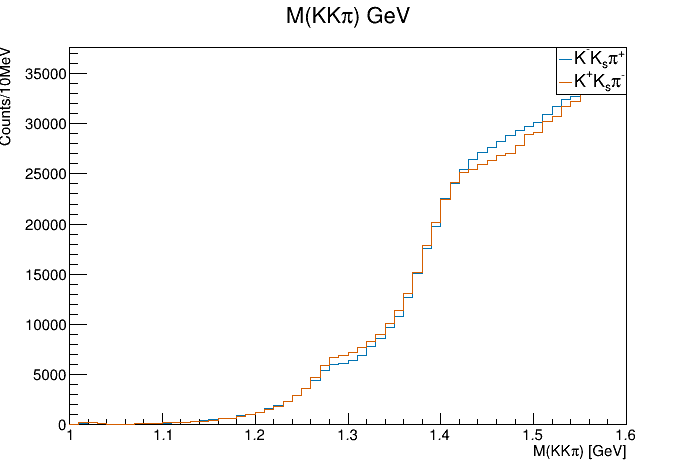

In [9]:
print(f'mx2 all cut pipkmks: {n_mx2all_pipkmks} || pimkpks: {n_mx2all_pimkpks}')
print(f'mx2 all efficiency pipkmks: {n_mx2all_pipkmks/n_uncut_pipkmks} || pimkpks: {n_mx2all_pimkpks/n_uncut_pimkpks}')
hist_pipkmks_mx2all.Draw()
hist_pimkpks_mx2all.Draw('same')
legend.Draw()
c.Draw()

In [10]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT)
n_kspl_pipkmks = df_pipkmks.Count().GetValue()
n_kspl_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kspl, hist_pimkpks_kspl = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kspl')



palthlength filtered pipkmks: 311770 || pathlength filtered pimkpks: 298905
cut efficiency pipkmks = 0.41120842016407716 || cut efficiency pimkpks = 0.3979467939791085


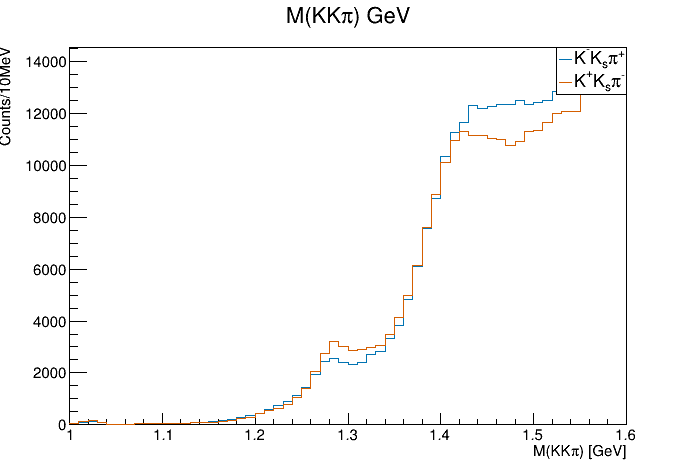

In [11]:
print(f'palthlength filtered pipkmks: {n_kspl_pipkmks} || pathlength filtered pimkpks: {n_kspl_pimkpks}')
print(f'cut efficiency pipkmks = {n_kspl_pipkmks/n_mx2all_pipkmks} || cut efficiency pimkpks = {n_kspl_pimkpks/n_mx2all_pimkpks}')
hist_pipkmks_kspl.Draw()
hist_pimkpks_kspl.Draw('same')
legend.Draw()
c.Draw()


In [12]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_MASS_CUT)
n_ksm_pipkmks = df_pipkmks.Count().GetValue()
n_ksm_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ksm, hist_pimkpks_ksm = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_m_cut')

kshort mass cut pipkmks: 258822 || kshort mass cut pimkpks: 246550
kshort mass cut efficiency pipkmks: 0.8301696763639863 || pimkpks 0.8248440139843763


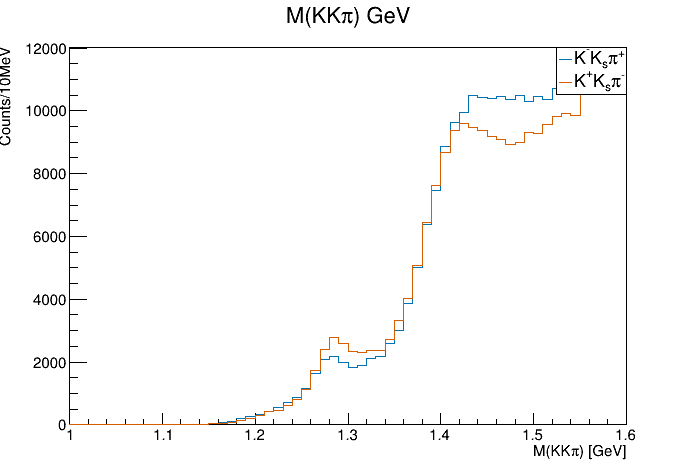

In [13]:
print(f'kshort mass cut pipkmks: {n_ksm_pipkmks} || kshort mass cut pimkpks: {n_ksm_pimkpks}')
print(f'kshort mass cut efficiency pipkmks: {n_ksm_pipkmks / n_kspl_pipkmks} || pimkpks {n_ksm_pimkpks / n_kspl_pimkpks}')
hist_pipkmks_ksm.Draw()
hist_pimkpks_ksm.Draw('same')
legend.Draw()
c.Draw()

In [14]:
df_pipkmks = df_pipkmks.Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.P_P_CUT)
n_pp_pipkmks = df_pipkmks.Count().GetValue()
n_pp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_pp, hist_pimkpks_pp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'pp')

proton momentum cut pipkmks: 218781 || pimkpks: 206707
proton momentum cut efficiency pipkmks: 0.8452952221990403 || pimkpks: 0.8383978908943419


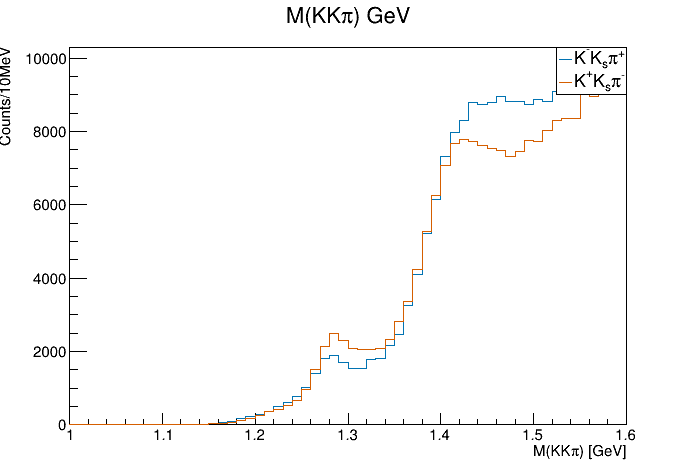

In [15]:
print(f'proton momentum cut pipkmks: {n_pp_pipkmks} || pimkpks: {n_pp_pimkpks}')
print(f'proton momentum cut efficiency pipkmks: {n_pp_pipkmks/n_ksm_pipkmks} || pimkpks: {n_pp_pimkpks/n_ksm_pimkpks}')
hist_pipkmks_pp.Draw()
hist_pimkpks_pp.Draw('same')
legend.Draw()
c.Draw()

In [16]:
df_pipkmks = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT)
n_ppi_pipkmks = df_pipkmks.Count().GetValue()
n_ppi_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ppi, hist_pimkpks_ppi = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ppi')

n ppi cut pipkmks: 187831 || pimkpks: 179658
ppi cut efficicnecy pipkmks: 0.8585343334201782 || pimkpks: 0.8691432801017865


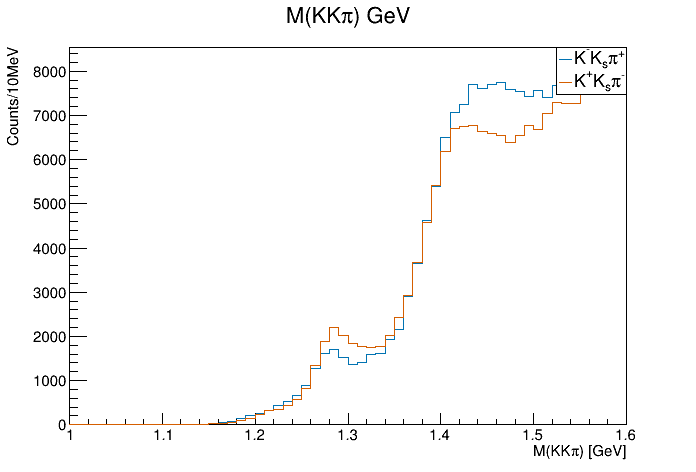

In [17]:
print(f'n ppi cut pipkmks: {n_ppi_pipkmks} || pimkpks: {n_ppi_pimkpks}')
print(f'ppi cut efficicnecy pipkmks: {n_ppi_pipkmks / n_pp_pipkmks} || pimkpks: {n_ppi_pimkpks / n_pp_pimkpks}')
hist_pipkmks_ppi.Draw()
hist_pimkpks_ppi.Draw('same')
legend.Draw()
c.Draw()

In [18]:
df_pipkmks = df_pipkmks.Filter(kcuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KSP_MASS_CUT)
n_kmp_pipkmks = df_pipkmks.Count().GetValue()
n_ksp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kp, hist_pimkpks_kp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kp')

n kp cut pipkmks: 177645 || pimkpks: 168285
kp cut efficiency pipkmks: 0.9457703999872226 || pimkpks: 0.9366963898073005


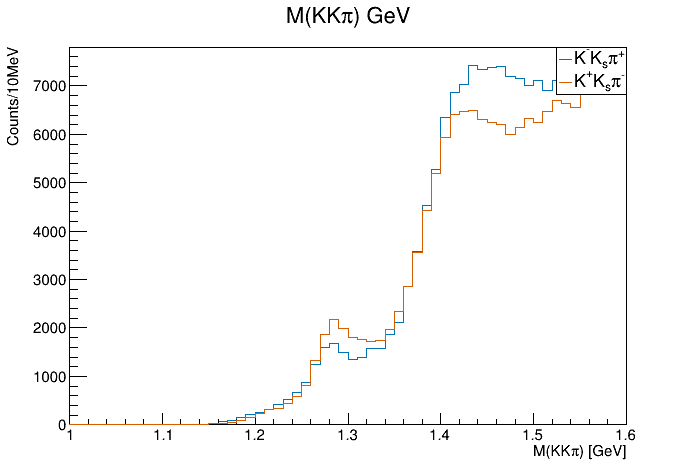

In [19]:
print(f'n kp cut pipkmks: {n_kmp_pipkmks} || pimkpks: {n_ksp_pimkpks}')
print(f'kp cut efficiency pipkmks: {n_kmp_pipkmks/n_ppi_pipkmks} || pimkpks: {n_ksp_pimkpks/n_ppi_pimkpks}')
hist_pipkmks_kp.Draw()
hist_pimkpks_kp.Draw('same')
legend.Draw()
c.Draw()

In [21]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)
n_kstar_pipkmks = df_pipkmks.Count().GetValue()
n_kstar_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kstar, hist_pimkpks_kstar = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kstar')

kstar cut pipkmks: 26367 || pimkpks: 26107
kstar efficiency: 0.14842523009372624 || pimkpks: 0.15513563300353567


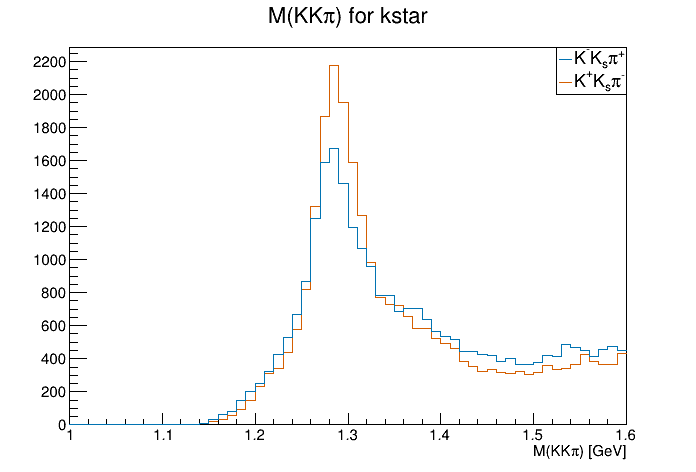

In [23]:
print(f'kstar cut pipkmks: {n_kstar_pipkmks} || pimkpks: {n_kstar_pimkpks}')
print(f'kstar efficiency: {n_kstar_pipkmks/n_kmp_pipkmks} || pimkpks: {n_kstar_pimkpks/n_ksp_pimkpks}')
hist_pimkpks_kstar.Draw()
hist_pipkmks_kstar.Draw('same')
legend.Draw()
c.Draw()

In [24]:
print(f'total efficiency pipkmks: {n_kstar_pipkmks/n_uncut_pimkpks} || pimkpks: {n_kstar_pimkpks/n_uncut_pimkpks}')

total efficiency pipkmks: 0.026629970963262216 || pimkpks: 0.02636737785633127
